# EDA

- **Objetivo Principal**
    - Desenvolver um modelo preditivo capaz de determinar o resultado (vitória, empate ou derrota) de partidas de futebol com a maior precisão possível.

- **Objetivos específicos**:
    - Identificar os principais fatores que influenciam o resultado das partidas (e.g., desempenho histórico das equipes, estatísticas de jogadores, condições climáticas).


- **Conheça as variáveis**: 
	- Saiba o significado das colunas e o contexto em que os dados foram coletados.
- **Identifique as perguntas-chave**: 
	- O que você espera aprender com a EDA?

In [1]:
import os
import numpy as np
import pandas as pd
from datetime import datetime

pd.set_option('display.max_columns', 1000)
# pd.set_option('display.max_rows', 100)

In [2]:
import sqlite3
import pandas as pd
import os
from pathlib import Path


def create_connection(db_path):
    """Cria a conexão com o banco de dados SQLite."""
    connection = None
    try:
        connection = sqlite3.connect(db_path)

        print("Conexão SQLite estabelecida.")
    except sqlite3.Error as e:
        print(f"Erro ao conectar ao SQLite: {e}")
    return connection

BASE_DIR = os.path.dirname(os.path.dirname(os.path.dirname(os.path.abspath('__file__'))))
DATA_DIR = os.path.join(BASE_DIR, 'database')
FT_DIR = os.path.join(BASE_DIR, 'modelagem', 'feature_eng', 'data')

conn = create_connection(db_path=Path(os.path.join(DATA_DIR, "soccer_data.db")))
country = "Brazil"
query = "SELECT * FROM soccer_data WHERE country = ?"

df = pd.read_sql_query(query, conn, params=(country,))

conn.close()


Conexão SQLite estabelecida.


In [3]:
df.head()

,id,country,league,season,home_team,away_team,home_score,away_score,result,psch,pscd,psca,maxch,maxcd,maxca,avgch,avgcd,avgca,bfech,bfecd,datetime,hash,last_updated
0,5415,Brazil,Serie A,2012,Palmeiras,Portuguesa,1,1,D,1.75,3.86,5.25,1.76,3.87,5.31,1.69,3.50,4.90,NaN,NaN,2012-05-19 22:30:00,10444097902145517897,2024-12-18 22:32:46
1,5416,Brazil,Serie A,2012,Sport Recife,Flamengo RJ,1,1,D,2.83,3.39,2.68,2.83,3.42,2.70,2.59,3.23,2.58,NaN,NaN,2012-05-19 22:30:00,7876314183501917566,2024-12-18 22:32:46
2,5417,Brazil,Serie A,2012,Figueirense,Nautico,2,1,H,1.60,4.04,6.72,1.67,4.05,7.22,1.59,3.67,5.64,NaN,NaN,2012-05-20 01:00:00,9296066046964045682,2024-12-18 22:32:46
3,5418,Brazil,Serie A,2012,Botafogo RJ,Sao Paulo,4,2,H,2.49,3.35,3.15,2.49,3.39,3.15,2.35,3.26,2.84,NaN,NaN,2012-05-20 20:00:00,3618841616446699339,2024-12-18 22:32:46
4,5419,Brazil,Serie A,2012,Corinthians,Fluminense,0,1,A,1.96,3.53,4.41,1.96,3.53,4.41,1.89,3.33,3.89,NaN,NaN,2012-05-20 20:00:00,11994628649421207242,2024-12-18 22:32:46


Qual é o historico de resultados

Text(0, 0.5, 'Resultado')

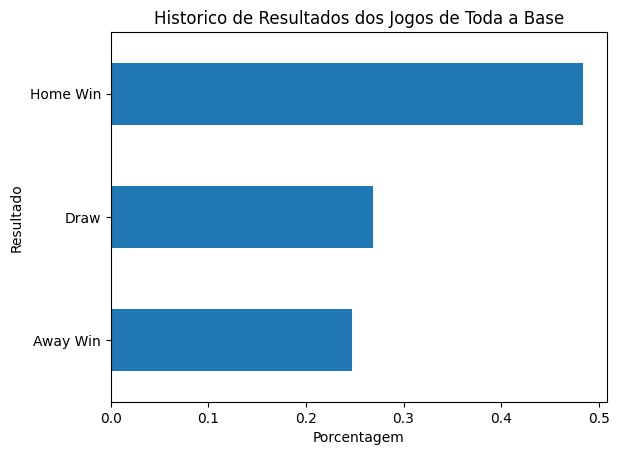

In [19]:
import matplotlib.pyplot as plt

map_result_name = {"H":"Home Win", "D":"Draw", "A":"Away Win"}
df["map_result_name"] = df["result"].map(map_result_name)
df['map_result_name'].value_counts(normalize=True, ascending=True).plot(kind="barh")

plt.title("Historico de Resultados dos Jogos de Toda a Base")
plt.xlabel("Porcentagem")
plt.ylabel("Resultado")

#### Qual a probabilidade dos resultados em um jogo?

In [ ]:
# Em um primeiro momento iremos calcular a probabilidade usando o resultado de todos os jogos



home_win = [] 
draw = [] 
away_win = []

In [118]:
dict_result = {'DRAW':0, 'AWAY_WIN':1, 'HOME_WIN':2}
df['winner'] = np.where(df['home_score'] > df['away_score'], dict_result["HOME_WIN"], np.where(df['home_score'] < df['away_score'], dict_result['AWAY_WIN'], dict_result['DRAW']))

df['match_name'] = df['home_team']+' - '+df['away_team']

df['season'] = df['season'].astype(int)

In [119]:
df

,id,country,league,season,home_team,away_team,home_score,away_score,result,psch,pscd,psca,maxch,maxcd,maxca,avgch,avgcd,avgca,bfech,bfecd,datetime,hash,last_updated,winner,match_name
0,5415,Brazil,Serie A,2012,Palmeiras,Portuguesa,1,1,D,1.75,3.86,5.25,1.76,3.87,5.31,1.69,3.50,4.90,NaN,NaN,2012-05-19 22:30:00,10444097902145517897,2024-12-18 22:32:46,0,Palmeiras - Portuguesa
1,5416,Brazil,Serie A,2012,Sport Recife,Flamengo RJ,1,1,D,2.83,3.39,2.68,2.83,3.42,2.70,2.59,3.23,2.58,NaN,NaN,2012-05-19 22:30:00,7876314183501917566,2024-12-18 22:32:46,0,Sport Recife - Flamengo RJ
2,5417,Brazil,Serie A,2012,Figueirense,Nautico,2,1,H,1.60,4.04,6.72,1.67,4.05,7.22,1.59,3.67,5.64,NaN,NaN,2012-05-20 01:00:00,9296066046964045682,2024-12-18 22:32:46,2,Figueirense - Nautico
3,5418,Brazil,Serie A,2012,Botafogo RJ,Sao Paulo,4,2,H,2.49,3.35,3.15,2.49,3.39,3.15,2.35,3.26,2.84,NaN,NaN,2012-05-20 20:00:00,3618841616446699339,2024-12-18 22:32:46,2,Botafogo RJ - Sao Paulo
4,5419,Brazil,Serie A,2012,Corinthians,Fluminense,0,1,A,1.96,3.53,4.41,1.96,3.53,4.41,1.89,3.33,3.89,NaN,NaN,2012-05-20 20:00:00,11994628649421207242,2024-12-18 22:32:46,1,Corinthians - Fluminense
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4934,10349,Brazil,Serie A,2024,Flamengo RJ,Vitoria,2,2,D,1.38,5.20,7.93,1.40,5.30,8.25,1.37,5.02,7.66,1.41,5.40,2024-12-08 19:00:00,13090211533677099395,2024-12-18 22:32:46,0,Flamengo RJ - Vitoria
4935,10350,Brazil,Serie A,2024,Fortaleza,Internacional,3,0,H,2.62,3.24,2.88,2.65,3.25,2.90,2.59,3.18,2.80,2.70,3.35,2024-12-08 19:00:00,780931226434892506,2024-12-18 22:32:46,2,Fortaleza - Internacional
4936,10351,Brazil,Serie A,2024,Gremio,Corinthians,0,3,A,2.74,3.35,2.66,2.77,3.46,2.74,2.67,3.34,2.61,2.86,3.55,2024-12-08 19:00:00,14826763340144835851,2024-12-18 22:32:46,1,Gremio - Corinthians
4937,10352,Brazil,Serie A,2024,Juventude,Cruzeiro,0,1,A,2.13,3.42,3.59,2.21,3.47,3.59,2.13,3.37,3.44,2.20,3.55,2024-12-08 19:00:00,18046607925159384753,2024-12-18 22:32:46,1,Juventude - Cruzeiro


In [120]:
ens

NameError: name 'ens' is not defined

### Feature: Força do time
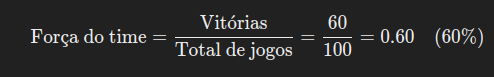


Um gráfico exibindo a força de um time ao longo do tempo seria legal 

In [70]:
df.sort_values(by='datetime', ascending=False, inplace=True)

<Axes: ylabel='proportion'>

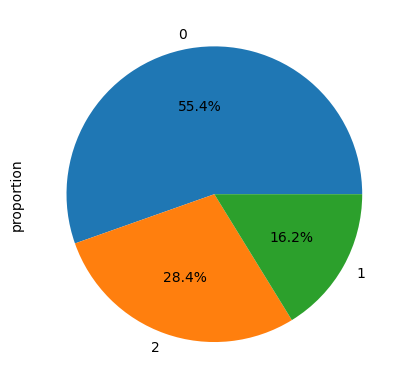

In [71]:
x = df.sample()

home_team = x['home_team'].item()
away_team = x['away_team'].item()

dict_times = {'team_1':home_team, 'away_team_2':away_team}

df_performance_time = df[
        (df['home_team'] == dict_times['team_1']) & 
        (df['winner'] == dict_result['HOME_WIN']) | 

        (df['away_team'] == dict_times['team_1']) & 
        (df['winner'] == dict_result['AWAY_WIN']) |

        (df['match_name'].str.contains(dict_times['team_1'])) &
        (df['winner'] == dict_result['DRAW']) 
        ]

df_performance_time['winner'].value_counts(normalize=True).plot.pie(autopct='%1.1f%%')


In [ ]:
# Query para saber se o time 1 ganhou

def get_performace_time(time, dias_atras=30):
    df_time = df[(df['match_name'].str.contains(time))].iloc[0:dias_atras]

    qtd_home_vitoria = df_time[(df_time['home_team'] == time) & 
                        (df_time['winner'] == dict_result['HOME_WIN'])
                        ].shape[0]

    qtd_away_vitoria = df_time[(df_time['away_team'] == time) & 
                        (df_time['winner'] == dict_result['AWAY_WIN'])
                        ].shape[0]

    qtd_home_derrotas = df_time[(df_time['home_team'] == time) & 
                        (df_time['winner'] == dict_result['AWAY_WIN'])
                        ].shape[0]

    qtd_away_derrotas = df_time[(df_time['away_team'] == time) & 
                        (df_time['winner'] == dict_result['HOME_WIN'])
                        ].shape[0]

    qtd_draw = df_time[(df_time['winner'] == dict_result['DRAW'])].shape[0]

    return qtd_home_vitoria, qtd_away_vitoria, qtd_home_derrotas, qtd_away_derrotas, qtd_draw


def team_strength(vitorias, total_jogos):
    """
    A maneira mais básica de calcular a força de um time é observar a taxa de vitórias e derrotas ao longo de um período de tempo. Um cálculo simples seria a porcentagem de vitórias em relação ao total de jogos.
    """
    if vitorias+total_jogos == 0:
        return 0

    return (vitorias/total_jogos)

qtd_home_vitoria, qtd_away_vitoria, qtd_home_derrotas, qtd_away_derrotas, qtd_draw = get_performace_time(time=dict_times['team_1'])
total_jogos = qtd_home_vitoria+qtd_away_vitoria+qtd_home_derrotas+qtd_away_derrotas+qtd_draw
vitorias = qtd_home_vitoria+qtd_away_vitoria

team_strength(vitorias=vitorias, total_jogos=total_jogos)


0.2

### Feature: Elo Rating

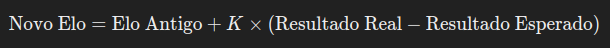

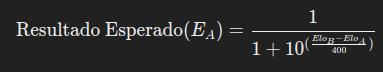

In [73]:
# POSITIVO: time da casa ganhou e time visitante perdeu
# NEGATIVO: time visitante ganhou e time da casa perdeu
# 0: Houve empate

In [74]:

#df_all = df[df['season']==2022].sort_values(by='date')
df_all = df[df['season']==2023].sort_values(by='datetime')

list_all_time = df_all['home_team'].unique()

df_elo = pd.DataFrame(list_all_time, columns=['team_name'])

df_elo['elo_rating'] = 0
df_elo['quantity_of_games'] = 0

df_elo.head()

,team_name,elo_rating,quantity_of_games
0,America MG,0,0
1,Palmeiras,0,0
2,Botafogo RJ,0,0
3,Fortaleza,0,0
4,Athletico-PR,0,0


In [76]:
def get_team_index(team_name):
    """
    Obtem o index de pesente na tabela elo passando o nome do time
    """
    return df_elo[df_elo['team_name']==team_name].index[0]

def get_team_elo_rating_by_idx(idx):
    """
    Obtem o elo do time de pesente na tabela elo passando o index do time
    """
    return df_elo.iloc[idx]['elo_rating']

def calc_elo_rating(elo_old, K, actual_result, expected_result):
    """
    Calcula o elo_rating 
    """
    return elo_old + K * (actual_result - expected_result)

def get_expected_result(elo_rating_team_win, elo_rating_team_loss):
    """
    O Resultado Esperado no sistema de Elo Rating é a probabilidade de um time ganhar com base na diferença de pontuação Elo entre os dois times. 
    A fórmula para calcular o Resultado Esperado de um time é:
    """
    diferenca_de_arpad_elo = (elo_rating_team_loss - elo_rating_team_win) / 400

    return 1/((10**diferenca_de_arpad_elo)+1)

def get_new_elo_ratings(
        actual_result_home,
        actual_result_away,
        elo_rating_team_win,
        elo_rating_team_loss,
        K=1):
    
    """
    Junta todas as informações para obter o elo_rating, para o time da casa e visitante
    """
    
    expected_result_home = get_expected_result(elo_rating_team_win=elo_rating_team_win, 
                                              elo_rating_team_loss=elo_rating_team_loss)
    
    expected_result_away = get_expected_result(elo_rating_team_win=elo_rating_team_loss, 
                                              elo_rating_team_loss=elo_rating_team_win)


    new_elo_home =  calc_elo_rating(elo_old=elo_rating_team_win, 
                                    K=K, 
                                    actual_result=actual_result_home, 
                                    expected_result=expected_result_home)
        
    new_elo_away =  calc_elo_rating(elo_old=elo_rating_team_loss, 
                                K=K, 
                                actual_result=actual_result_away, 
                                expected_result=expected_result_away)

    return new_elo_home, new_elo_away


In [77]:
import time

dict_actual_result = {'WIN':1, 'DRAW':0.5, 'LOSS':0}
K = 10
for idx, row in df_all.iterrows():

    home_team = row['home_team']
    away_team = row['away_team']

    idx_home_team = get_team_index(team_name=row['home_team'])
    idx_away_team = get_team_index(team_name=row['away_team'])

    elo_rating_home_team = get_team_elo_rating_by_idx(idx_home_team)
    elo_rating_away_team = get_team_elo_rating_by_idx(idx_away_team)

    # POSITIVO: time da casa ganhou e time visitante perdeu
    # NEGATIVO: time visitante ganhou e time da casa perdeu
    goal_result = row['home_score'] - row['away_score']

    if goal_result > 0:
        # HOME win and AWAY loss
        actual_result_home = dict_actual_result['WIN']
        actual_result_away = dict_actual_result['LOSS']

        new_elo_home, new_elo_away = get_new_elo_ratings(
                        actual_result_home = actual_result_home,
                        actual_result_away = actual_result_away,
                        elo_rating_team_win = elo_rating_home_team,
                        elo_rating_team_loss = elo_rating_away_team,
                        K=K
                        )
        
    elif goal_result < 0:
        # HOME loss and AWAY win
        actual_result_home = dict_actual_result['LOSS']
        actual_result_away = dict_actual_result['WIN']

        new_elo_home, new_elo_away = get_new_elo_ratings(
                        actual_result_home = actual_result_home,
                        actual_result_away = actual_result_away,
                        elo_rating_team_win = elo_rating_home_team,
                        elo_rating_team_loss = elo_rating_away_team,
                        K=K
                        )
    
    else:
        # HOME draw and AWAY draw
        actual_result_home = dict_actual_result['DRAW']
        actual_result_away = dict_actual_result['DRAW']

        new_elo_home, new_elo_away = get_new_elo_ratings(
                        actual_result_home = actual_result_home,
                        actual_result_away = actual_result_away,
                        elo_rating_team_win = elo_rating_home_team,
                        elo_rating_team_loss = elo_rating_away_team,
                        K=K
                        )
    
    df_all.loc[idx, 'old_elo_rating_home'] = elo_rating_home_team
    df_all.loc[idx, 'old_elo_rating_away'] = elo_rating_away_team
    df_all.loc[idx, 'new_elo_rating_home'] = new_elo_home
    df_all.loc[idx, 'new_elo_rating_away'] = new_elo_away

    df_elo.loc[idx_home_team, 'elo_rating'] = new_elo_home
    df_elo.loc[idx_away_team, 'elo_rating'] = new_elo_away


    #time.sleep(1)
    #print(f'home_team: {home_team}, away_team: {away_team}, goal_result: {goal_result}, new_elo_home: {new_elo_home}, new_elo_away: {new_elo_away}')

    #if idx == 2:
    #    #break
     #   pass

/tmp/ipykernel_408784/259151517.py:64: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-4.856128158340013' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_elo.loc[idx_home_team, 'elo_rating'] = new_elo_home


In [78]:
# Resultado (Achei bem bacana, se realizar por temporada reflete bem o desempenho de cada equipe)

df_elo.sort_values(by='elo_rating', ascending=False)

,team_name,elo_rating,quantity_of_games
1,Palmeiras,46.277751,0
6,Atletico-MG,38.343088,0
9,Gremio,35.096359,0
7,Flamengo RJ,34.899274,0
5,Bragantino,23.387384,0
2,Botafogo RJ,20.123019,0
4,Athletico-PR,13.455928,0
14,Internacional,11.420920,0
10,Fluminense,5.552177,0
12,Sao Paulo,5.159331,0


In [79]:
df_all[["match_name","home_team","away_team","winner","home_score","away_score","old_elo_rating_home","old_elo_rating_away"]].sample(5)

,match_name,home_team,away_team,winner,home_score,away_score,old_elo_rating_home,old_elo_rating_away
4308,Goias - Coritiba,Goias,Coritiba,1,1,2,-18.048824,-36.580853
4414,Gremio - Palmeiras,Gremio,Palmeiras,2,1,0,20.090774,38.573503
4455,Internacional - Santos,Internacional,Santos,2,7,1,-13.552366,-20.594386
4300,Bahia - Gremio,Bahia,Gremio,1,1,2,-13.385985,18.846326
4322,Fortaleza - Cuiaba,Fortaleza,Cuiaba,1,0,1,13.717448,-9.529729


---

In [ ]:
# Seleciona uma amostra aleatória
x = df.sample()

# Times envolvidos
home_team = x['home_team'].item()
away_team = x['away_team'].item()

dict_times = {'team_1': home_team, 'team_2': away_team}

# Quantidade de jogos a considerar
qtd_ultimos_jogos = 40

# Nomes dos times
time_1 = dict_times['team_1']
time_2 = dict_times['team_2']

# Filtra os jogos entre os dois times
df_time = df[(df['match_name'].str.contains(time_1)) &
             (df['match_name'].str.contains(time_2))]

# Ordena por data, se disponível, e seleciona os últimos jogos
if 'datetime' in df.columns:
    df_time = df_time.sort_values(by='datetime', ascending=False).iloc[0:qtd_ultimos_jogos]

# Calcula as vitórias, derrotas e empates
qtd_time_1_vitorias = df_time[((df_time['home_team'] == time_1) &
                               (df_time['winner'] == dict_result['HOME_WIN'])) |
                              ((df_time['away_team'] == time_1) &
                               (df_time['winner'] == dict_result['AWAY_WIN']))]

qtd_time_1_derrotas = df_time[((df_time['home_team'] == time_1) &
                               (df_time['winner'] == dict_result['AWAY_WIN'])) |
                              ((df_time['away_team'] == time_1) &
                               (df_time['winner'] == dict_result['HOME_WIN']))]

empate = df_time[df_time['winner'] == dict_result['DRAW']].shape[0]

# Exibe os resultados
# Calcula as taxas de vitória, derrota e empate
taxa_vitorias = round((qtd_time_1_vitorias.shape[0] / df_time.shape[0]) * 100, 2) if df_time.shape[0] > 0 else 0
taxa_derrotas = round((qtd_time_1_derrotas.shape[0] / df_time.shape[0]) * 100, 2) if df_time.shape[0] > 0 else 0
taxa_empates = round((empate / df_time.shape[0]) * 100, 2) if df_time.shape[0] > 0 else 0

# Exibe os resultados com mais informações
print(f'''
      Desempenho do {time_1} contra o {time_2} nos últimos {df_time.shape[0]} jogos:

      - Vitórias do {time_1}: {qtd_time_1_vitorias.shape[0]} ({taxa_vitorias}%)
      - Derrotas do {time_1}: {qtd_time_1_derrotas.shape[0]} ({taxa_derrotas}%)
      - Empates: {empate} ({taxa_empates}%)

      Total de jogos analisados: {df_time.shape[0]}
''')




      Desempenho do Criciuma contra o Flamengo RJ nos últimos 6 jogos:

      - Vitórias do Criciuma: 0 (0.0%)
      - Derrotas do Criciuma: 5 (83.33%)
      - Empates: 1 (16.67%)

      Total de jogos analisados: 6



In [102]:

def get_performace_time(time, dias_atras=30):
    df_time = df[(df['match_name'].str.contains(time))].iloc[0:dias_atras]

    qtd_home_vitoria = df_time[(df_time['home_team'] == time) & 
                        (df_time['winner'] == dict_result['HOME_WIN'])
                        ].shape[0]

    qtd_away_vitoria = df_time[(df_time['away_team'] == time) & 
                        (df_time['winner'] == dict_result['AWAY_WIN'])
                        ].shape[0]

    qtd_home_derrotas = df_time[(df_time['home_team'] == time) & 
                        (df_time['winner'] == dict_result['AWAY_WIN'])
                        ].shape[0]

    qtd_away_derrotas = df_time[(df_time['away_team'] == time) & 
                        (df_time['winner'] == dict_result['HOME_WIN'])
                        ].shape[0]

    qtd_draw = df_time[(df_time['winner'] == dict_result['DRAW'])].shape[0]

    return qtd_home_vitoria, qtd_away_vitoria, qtd_home_derrotas, qtd_away_derrotas, qtd_draw

In [104]:
df['datetime'].min(), df['datetime'].max()

('2012-05-19 22:30:00', '2024-12-08 19:00:00')

In [ ]:
df_2023 = df[df['season']==2023].copy()

df_2023.sort_values(by='date', ascending=True, inplace=True)

In [106]:
# Quantas veses o time_1 do time time_2
# 

x = df.sample()

# Times envolvidos
time_1 = x['home_team'].item()
time_2 = x['away_team'].item()

dict_time_1_time_2 = df[df['match_name'] == f'{time_1} - {time_2}']['winner'].value_counts().to_dict()
dict_time_2_time_1 = df[df['match_name'] == f'{time_2} - {time_1}']['winner'].value_counts().to_dict()


dict_time_2_time_1, dict_time_1_time_2

({2: 1, 0: 1, 1: 1}, {0: 1, 1: 1, 2: 1})

In [110]:
def percents_time(dict_time_x_time_x):
    HOME_TEAM = dict_time_x_time_x.get(dict_result['HOME_WIN'], 0)
    DRAW = dict_time_x_time_x.get(dict_result['DRAW'], 0)
    AWAY_TEAM = dict_time_x_time_x.get(dict_result['AWAY_WIN'], 0)

    total_jogos = HOME_TEAM+DRAW+AWAY_TEAM

    percent_time_x_win = round(HOME_TEAM/total_jogos, 2)
    percent_time_x_drew = round(DRAW/total_jogos, 2)
    percent_time_x_loss = round(AWAY_TEAM/total_jogos, 2)

    return percent_time_x_win, percent_time_x_drew, percent_time_x_loss

In [111]:
(percent_time_1_win, 
 percent_time_1_drew, 
 percent_time_1_loss) = percents_time(dict_time_1_time_2)

(percent_time_2_win, 
 percent_time_2_drew, 
 percent_time_2_loss) = percents_time(dict_time_2_time_1)

print(f'Time {time_1} Vs {time_2}')
print(f'<Home> Ganhar: {percent_time_1_win}%, Empatar: {percent_time_1_drew}%, Perder: {percent_time_1_loss}%')

print(f'Time {time_2} Vs {time_1}')
print(f'<Home> Ganhar: {percent_time_2_win}%, Empatar: {percent_time_2_drew}%, Perder: {percent_time_2_loss}%')


Time Criciuma Vs Sao Paulo
<Home> Ganhar: 0.33%, Empatar: 0.33%, Perder: 0.33%
Time Sao Paulo Vs Criciuma
<Home> Ganhar: 0.33%, Empatar: 0.33%, Perder: 0.33%


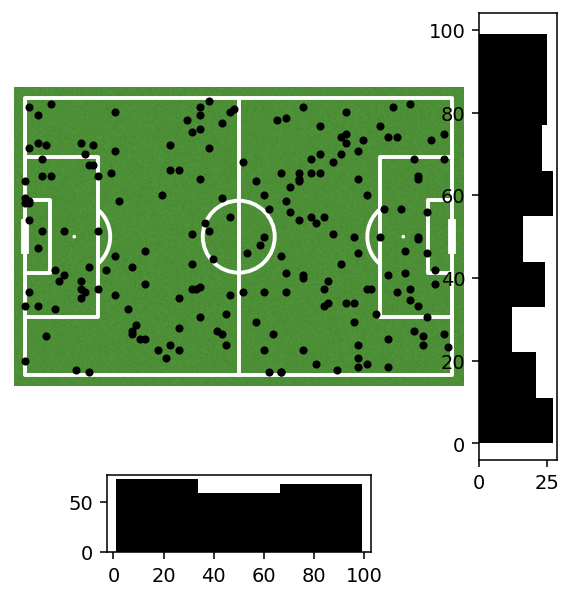

In [112]:
from mplsoccer.pitch import Pitch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = pd.DataFrame(np.random.randint(0,100,size=(200, 2)), columns=['X', 'Y'])
fig = plt.figure(figsize=(5,5), dpi = 140)
grid = plt.GridSpec(6, 6)

a1 = fig.add_subplot(grid[0:5, 0:5])
a2 = fig.add_subplot(grid[5, 1:4],sharex=a1)
a3 = fig.add_subplot(grid[0:5, 5],sharey=a1)

pitch = Pitch(pitch_color='grass', pitch_type='opta', line_color='white', stripe=False)
pitch.draw(ax=a1)
pitch.scatter(df['X'], df['Y'],
                    s=10, c='black', label='scatter', ax=a1)

a2.hist(df['Y'], 3, color = 'black', histtype='stepfilled')
a3.hist(df['X'], 9, orientation='horizontal', color='black', histtype='stepfilled')

plt.show()

In [ ]:
# Converter AM para PM

def convert_AM_to_PM(hora_am:str):

    dict_AM_PM = {str(hora_am):str(hora_pm) for hora_pm, hora_am in zip(range(13, 25), range(1, 13))}

    hora_PM = dict_AM_PM[str(hora_am)]

    print(f'A hora em PM é {hora_PM}')
    
convert_AM_to_PM(hora_am=4)

A hora em PM é 16
